In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
from numpy.random import seed, randn
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, Birch, MiniBatchKMeans, SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
output_ships = pd.read_csv('/content/output_ships.csv')
output_deaths = pd.read_csv('/content/output_deaths.csv', encoding_errors = 'replace')
passengers = pd.read_csv('/content/unique-passenger-counts-over-100-by-NZ-port-and-citizenship-year-ended-june-2019.csv')

# Deaths on cruise ships research

###Top deaths on cruise ships

In [ ]:
ship_of_death = output_deaths['ship_name']
death_ship_count = ship_of_death.value_counts()
top_10 = death_ship_count[:10]
t10 = pd.DataFrame(top_10)

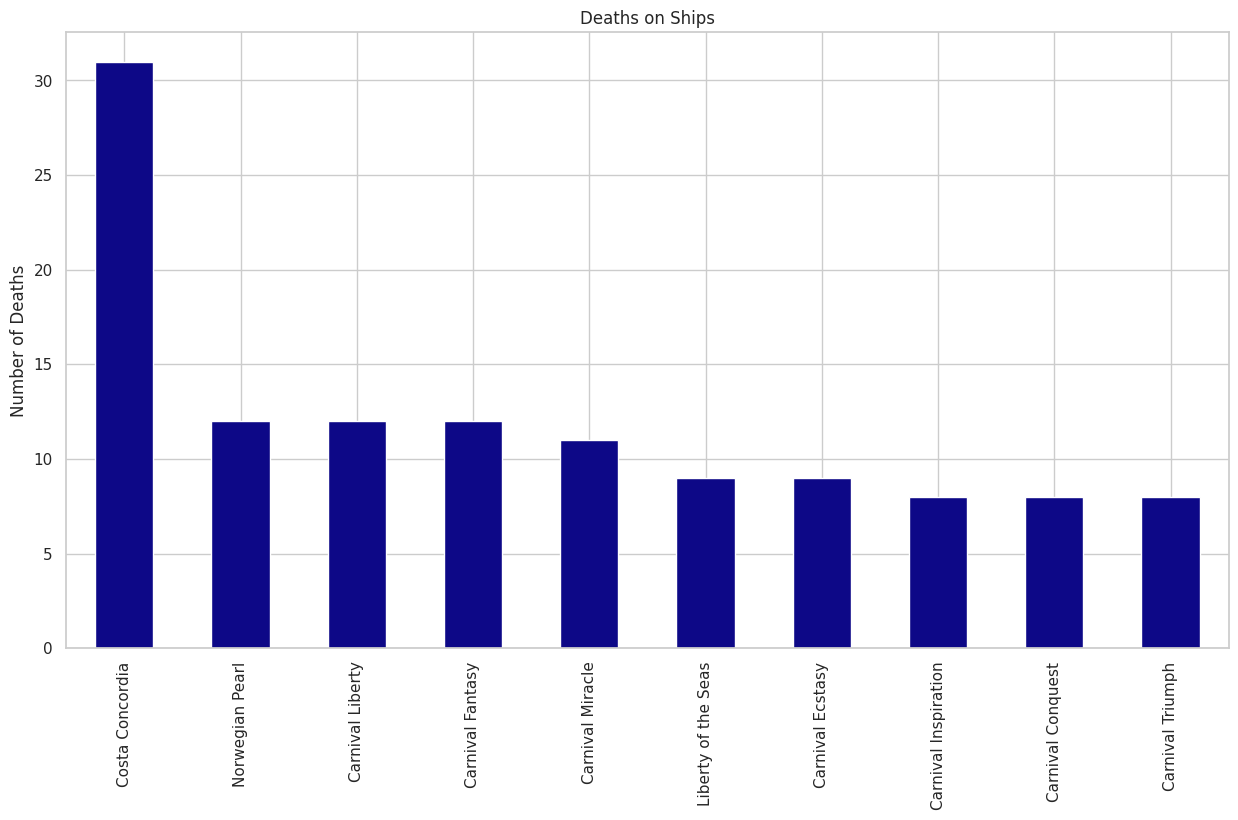

In [ ]:
t10.plot(kind = 'bar', colormap = 'plasma', legend = False, title = 'Deaths on Ships', ylabel = 'Number of Deaths')
plt.show()

**On this plot we can see a number of deaths on each ship in years 2000 - 2017**

## Reasons research

### Deaths timeline

In [ ]:
output_deaths['date_published'] = pd.to_datetime(output_deaths['date_published']).dt.year

In [ ]:
pivot_deaths = pd.pivot_table(data = output_deaths, index = 'date_published', columns = 'death_type', aggfunc =['count'])

In [ ]:
pivot_deaths_alt = pd.pivot_table(data = output_deaths, index = 'date_published', values = 'death_type', aggfunc =[len, lambda x: x.mode().iloc[0]])
pivot_deaths_alt = pivot_deaths_alt.reset_index(inplace = False)
pivot_deaths_alt.columns = [' '.join(col).strip() for col in pivot_deaths_alt.columns.values]
pivot_deaths_alt.rename(columns = {'len death_type': 'death_type_count', '<lambda> death_type':'the_most_common_type'}, inplace = True)
pivot_deaths_alt

,date_published,death_type_count,the_most_common_type
0,2000,5,natural
1,2001,3,suicide
2,2002,3,drug-overdose
3,2003,2,suicide
4,2004,9,natural
5,2005,19,natural
6,2006,39,natural
7,2007,36,natural
8,2008,27,natural
9,2009,38,natural


<Axes: xlabel='date_published', ylabel='death_type_count'>

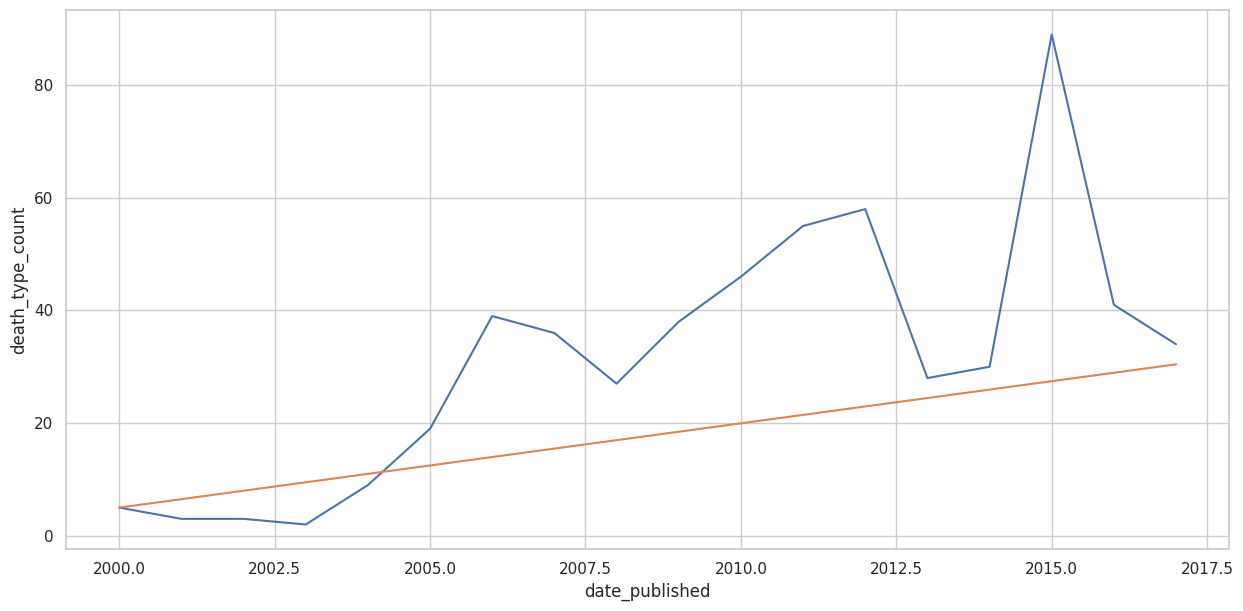

In [ ]:
plt.figure(figsize = (15, 7))

sns.lineplot(data = pivot_deaths_alt, x = 'date_published', y = 'death_type_count')
sns.lineplot(x = [2000, 2017], y = [5, np.mean(pivot_deaths_alt['death_type_count'][:-2])])

In [ ]:
pivot_deaths.columns = pivot_deaths.columns.get_level_values(2)
pivot_deaths.reset_index(inplace = True)


**We can see the the number of deths has been rising over the years. It's also obious that 2015 was a year with the highest number of deaths during the observed period.**

### Gender & Ship review frist list

In [ ]:
names_list_10 = ['Costa Concordia', 'Norwegian Pearl', 'Carnival Liberty', 'Carnival Fantasy', 'Carnival Miracle',
                 'Liberty of the Seas', 'Carnival Ecstasy', 'Carnival Inspiration', 'Carnival Conquest', 'Carnival Triumph']

In [ ]:
death_ships_10 = output_deaths[output_deaths['ship_name'].isin(names_list_10)]

In [ ]:
death_ships_10.drop(['ship_callsign', 'url'], axis = 1, inplace = True)
death_ships_10 = death_ships_10.reset_index()
death_ships_10.drop('index', axis = 1, inplace = True)

<ipython-input-138-f8e2af087537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_ships_10.drop(['ship_callsign', 'url'], axis = 1, inplace = True)


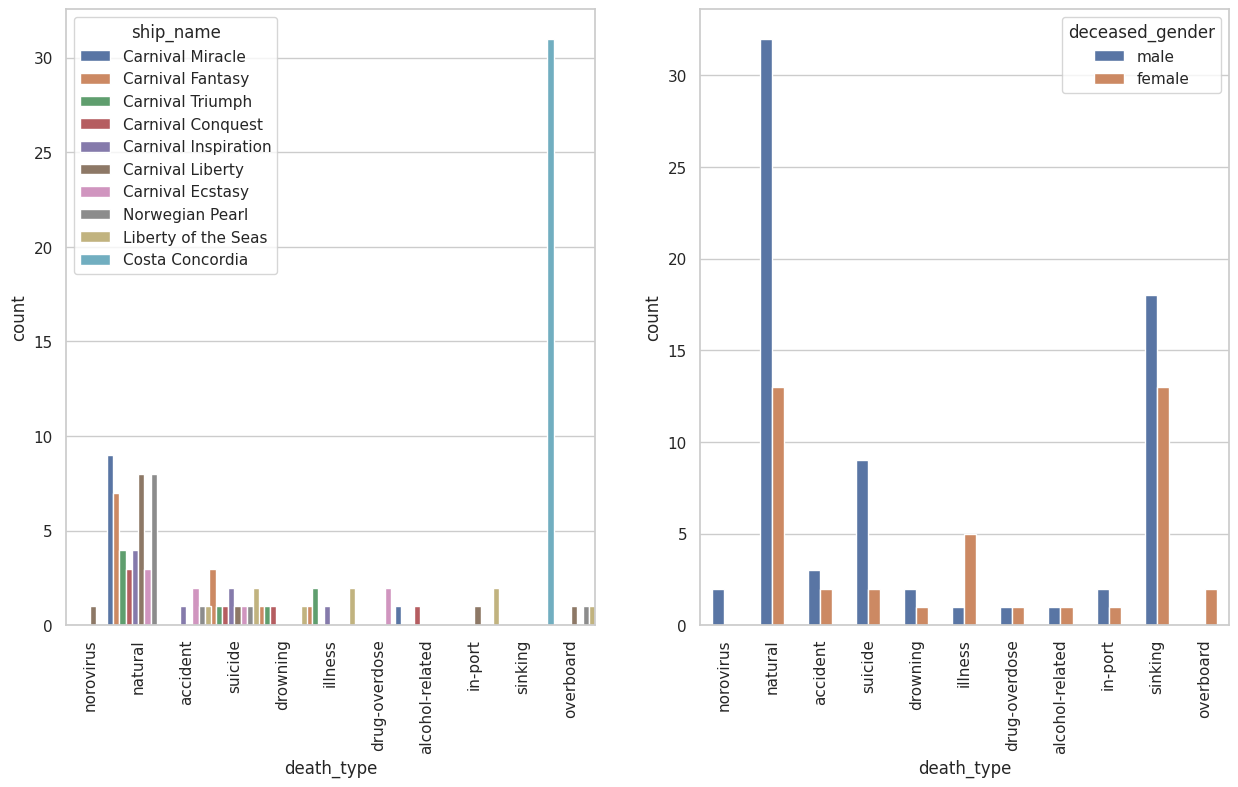

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(death_ships_10, x = 'death_type', hue = 'ship_name', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(death_ships_10, x = 'death_type', hue = 'deceased_gender', width=0.5)
plt.xticks(rotation = 90);

***While visualy analising the death rate graphs we can see an obviously outliying number of sinkings, which happened on Costa Concordia. Let's do a little research and maybe we will find an logical explanation for that.***
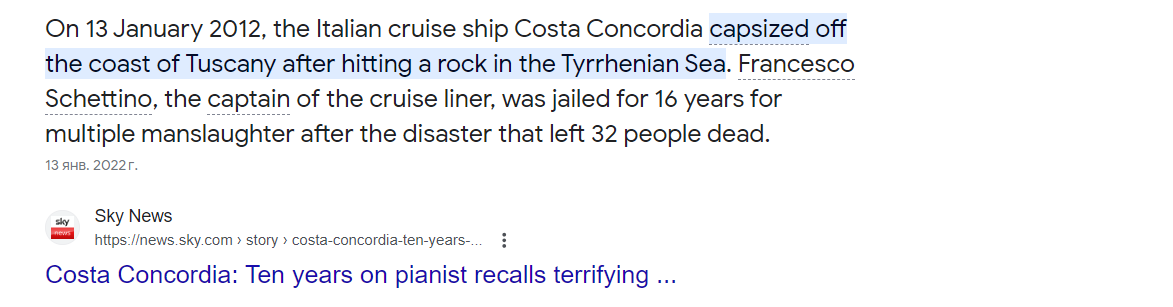

***An incompetent captain caused that disaster so let's get rid of Costa Concordia and ad another ship to our list.***

In [ ]:
names_list_10_new = ['Star Princess', 'Norwegian Pearl', 'Carnival Liberty', 'Carnival Fantasy', 'Carnival Miracle',
                 'Liberty of the Seas', 'Carnival Ecstasy', 'Carnival Inspiration', 'Carnival Conquest', 'Carnival Triumph']

In [ ]:
death_ships_10_new = output_deaths[output_deaths['ship_name'].isin(names_list_10_new)]

### Gender and Ship review new list

In [ ]:
death_ships_10_new.drop(['ship_callsign', 'url'], axis = 1, inplace = True)
death_ships_10_new = death_ships_10_new.reset_index()
death_ships_10_new.drop('index', axis = 1, inplace = True);

<ipython-input-142-13029bbf3038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_ships_10_new.drop(['ship_callsign', 'url'], axis = 1, inplace = True)


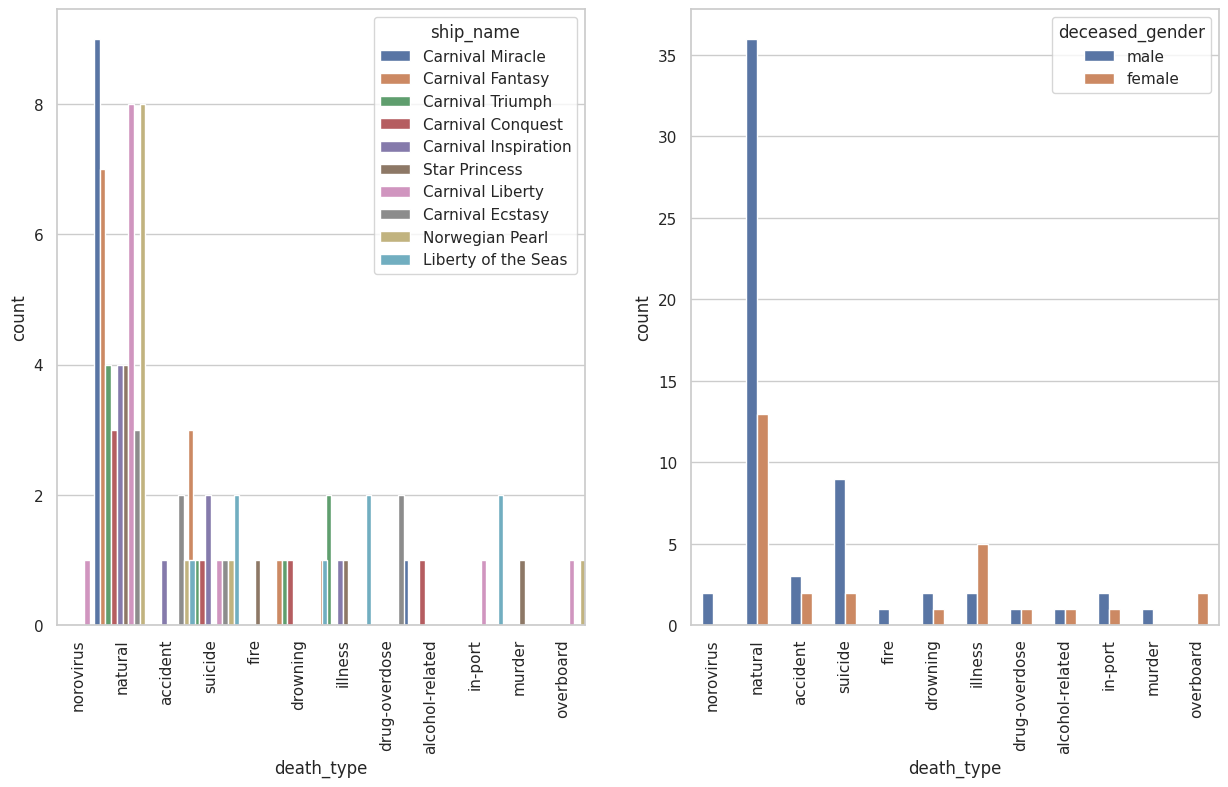

In [ ]:
plt.figure(figsize = (15,8))

sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(death_ships_10_new, x = 'death_type', hue = 'ship_name', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(death_ships_10_new, x = 'death_type', hue = 'deceased_gender', width=0.5)
plt.xticks(rotation = 90);

**We can see the the highest number of passengers dies from natural reasons. Also most of the are men.**

### Age review

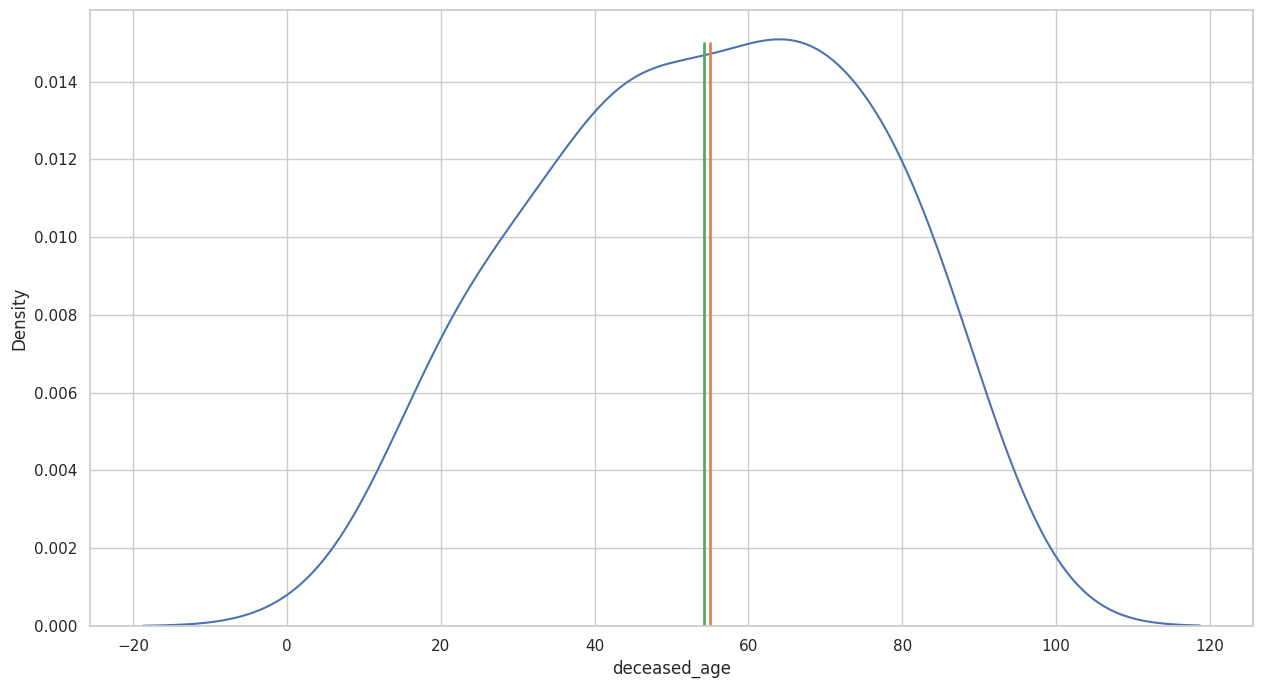

In [ ]:
sns.kdeplot(death_ships_10_new, x = 'deceased_age')
plt.plot([death_ships_10_new['deceased_age'].median(), death_ships_10_new['deceased_age'].median()], [0, 0.015], linewidth = 2)
plt.plot([death_ships_10_new['deceased_age'].mean(), death_ships_10_new['deceased_age'].mean()], [0, 0.015], linewidth = 2, color = 'g')

In [ ]:
death_pivot = pd.pivot_table(data = death_ships_10_new, values = 'deceased_age', index = 'death_type'	)

In [ ]:
death_pivot = death_pivot.reset_index(inplace=False)

In [ ]:
death_pivot

,death_type,deceased_age
0,accident,52.000000
1,alcohol-related,28.500000
2,drowning,46.000000
3,drug-overdose,32.000000
4,fire,72.000000
5,illness,59.750000
6,in-port,43.666667
7,natural,66.135135
8,norovirus,48.500000
9,overboard,32.333333


**The average age of death on cruise ships is about sixty years old.**

### Crew & Passenger review

In [ ]:
death_ships_10_new['is_crew'].value_counts()

False    91
True      5
Name: is_crew, dtype: int64

In [ ]:
death_ships_10_new['is_passenger'].value_counts()



True     88
False     8
Name: is_passenger, dtype: int64

In [ ]:
passengers_dead = death_ships_10_new[death_ships_10_new['is_passenger'] == True]
crew_dead = death_ships_10_new[death_ships_10_new['is_crew'] == True]

In [ ]:
display(death_ships_10_new[(death_ships_10_new['is_passenger'] == False) & (death_ships_10_new['is_crew'] == True)])
death_ships_10_new[(death_ships_10_new['is_passenger'] == False) & (death_ships_10_new['is_crew'] == False)]

,date_published,death_time,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name
34,2009,NaN,natural,Andres Caraan,NaN,male,False,True,Norwegian Cruise Line,Norwegian Pearl
75,2014,NaN,murder,Lemuel Lizada,NaN,male,False,True,Princess Cruises,Star Princess
77,2015,NaN,accident,Jose Sandoval Opazo,66.0,male,False,True,Carnival Cruise Line,Carnival Ecstasy
87,2016,NaN,overboard,Natalia (Naty) Molina Valenzuela,25.0,female,False,True,Norwegian Cruise Line,Norwegian Pearl
94,2017,NaN,overboard,Norman DeCastro,39.0,NaN,False,True,Royal Caribbean International,Liberty of the Seas


,date_published,death_time,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name
12,2007,NaN,natural,Yvonne Mouser,NaN,NaN,False,False,Carnival Cruise Line,Carnival Ecstasy
29,2009,NaN,illness,Tore Myhra,NaN,male,False,False,Royal Caribbean International,Liberty of the Seas
31,2009,NaN,illness,Jean Young��Legionella Cruise Ship��Liberty of...,70.0,female,False,False,Royal Caribbean International,Liberty of the Seas


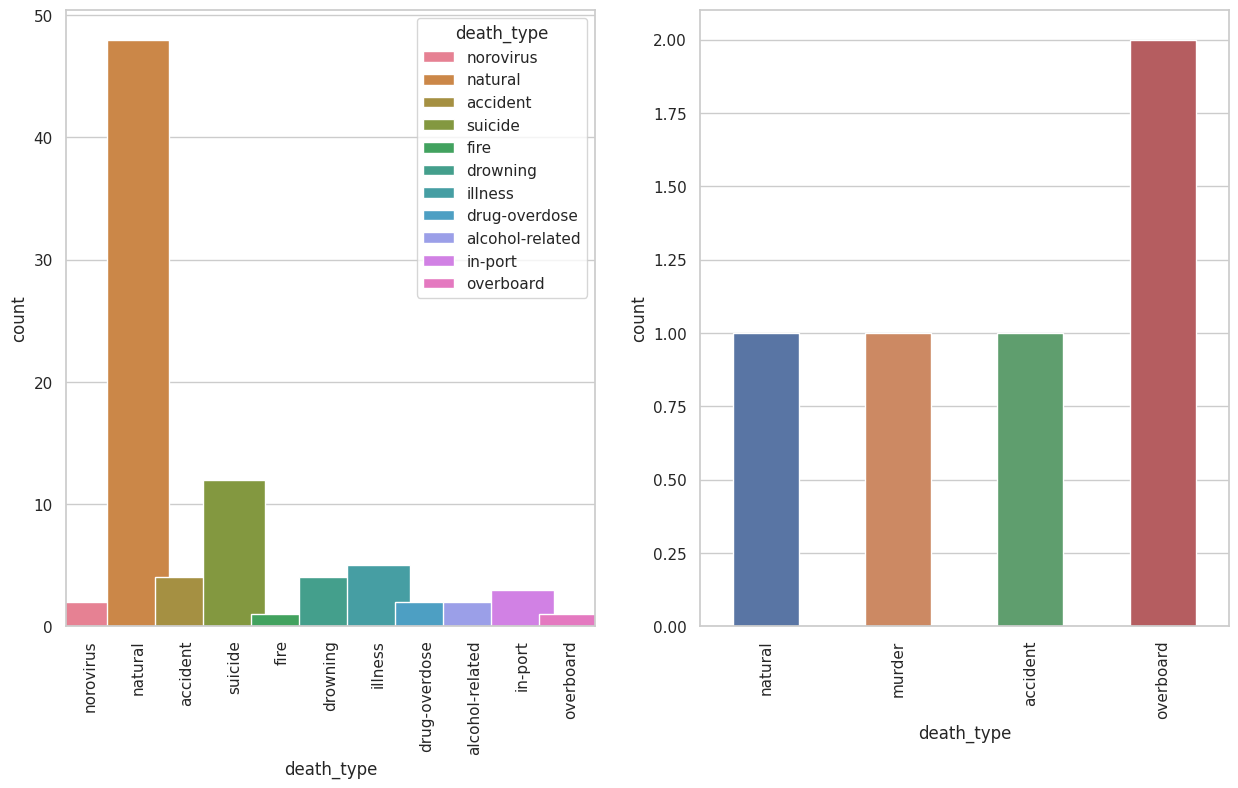

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(passengers_dead, x = 'death_type', hue = 'death_type', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(crew_dead, x = 'death_type', hue = 'death_type', width=0.5)
plt.xticks(rotation = 90);

**As we can see the number of passengers dying on cruise ships is much higher than the number of crew members. The leading death cause is natural.**

## Summary

***Let's take the most important datasets and visualisations and try yo draw some conclusions based on them.***

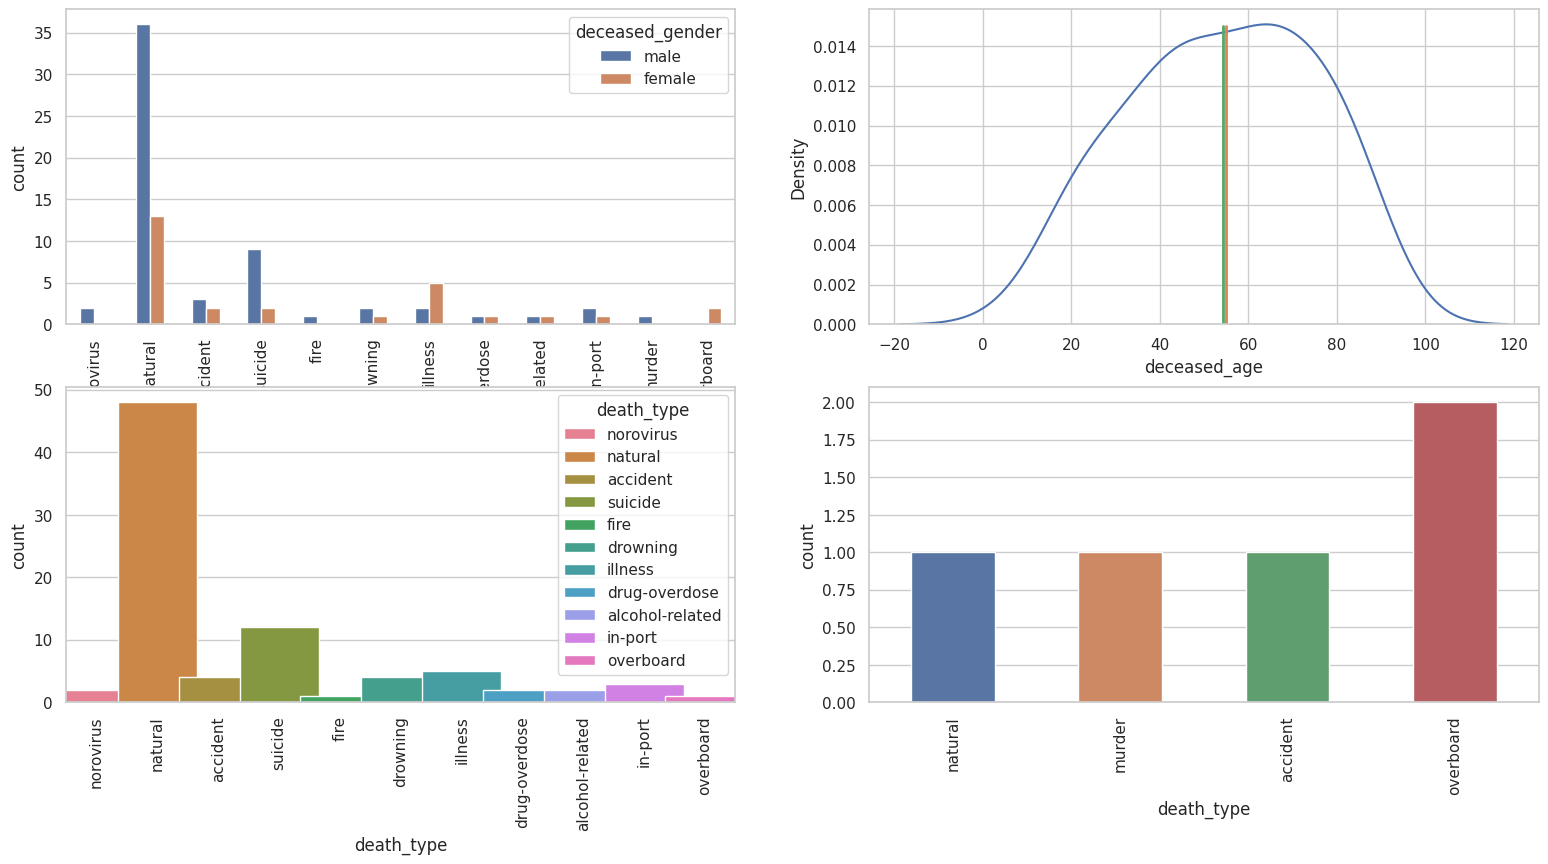

In [ ]:
plt.figure(figsize = (19,9))

plt.subplot(2, 2, 1)
sns.countplot(death_ships_10_new, x = 'death_type', hue = 'deceased_gender', width=0.5)
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2)
sns.kdeplot(death_ships_10_new, x = 'deceased_age')
plt.plot([death_ships_10_new['deceased_age'].median(), death_ships_10_new['deceased_age'].median()], [0, 0.015], linewidth = 2)
plt.plot([death_ships_10_new['deceased_age'].mean(), death_ships_10_new['deceased_age'].mean()], [0, 0.015], linewidth = 2, color = 'g')

plt.subplot(2, 2, 3)
sns.countplot(passengers_dead, x = 'death_type', hue = 'death_type', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(2, 2, 4)
sns.countplot(crew_dead, x = 'death_type', hue = 'death_type', width=0.5)
plt.xticks(rotation = 90);


In [ ]:
death_pivot

,death_type,deceased_age
0,accident,52.000000
1,alcohol-related,28.500000
2,drowning,46.000000
3,drug-overdose,32.000000
4,fire,72.000000
5,illness,59.750000
6,in-port,43.666667
7,natural,66.135135
8,norovirus,48.500000
9,overboard,32.333333


***So after visually analysing our plots and tabels we can first of all say that men near 60 belong to the most risky group of passengers in terms of death. Overall it's obvious that older people (both men and women) are the ones who are likely (for a lack of a better word) to die while traveling.***

#Modeling

##PCA

In [ ]:
deaths_analysis = output_deaths.drop(['ship_name', 'ship_callsign', 'url', 'ship_cruise_line', 'deceased_name', 'death_time'], axis = 1)
deaths_analysis['deceased_age'] = deaths_analysis.groupby('deceased_gender')['deceased_age'].transform(lambda x: x.fillna(x.mean()))
deaths_analysis['deceased_age'].fillna(deaths_analysis['deceased_age'].mean(), inplace = True)
deaths_analysis['deceased_age'] = deaths_analysis['deceased_age'].astype(int)

In [ ]:
print(deaths_analysis['is_passenger'].equals(deaths_analysis['is_crew']))
len(deaths_analysis[(deaths_analysis['is_crew'] == True) & (deaths_analysis['is_passenger'] == False)])

False


36

In [ ]:
def passenger_func (df, col1, col2):
  mask = (df[col1] == False) & (df[col2] == False)
  df.loc[mask, col1] = True
passenger_func(deaths_analysis, 'is_passenger', 'is_crew')

In [ ]:
deaths_analysis.drop('is_crew', axis = 1, inplace = True)

In [ ]:
pca = PCA()
enc = LabelEncoder()

In [ ]:
deaths_analysis['death_type'] = enc.fit_transform(deaths_analysis['death_type'])

In [ ]:
random_choice = np.random.choice([0, 1], p = [0.4, 0.6])
deaths_analysis['deceased_gender'] = deaths_analysis['deceased_gender'].apply(lambda x: 0 if x == 'female' else (1 if x == 'male' else random_choice))
deaths_analysis['deceased_gender'].value_counts()

1    376
0    186
Name: deceased_gender, dtype: int64

In [ ]:
deaths_analysis

,date_published,death_type,deceased_age,deceased_gender,is_passenger
0,2000,12,39,0,True
1,2000,14,45,0,True
2,2000,11,78,0,True
3,2000,10,53,0,True
4,2000,10,65,1,True
...,...,...,...,...,...
557,2017,9,55,1,True
558,2017,9,55,1,True
559,2017,9,55,1,True
560,2017,9,57,1,True


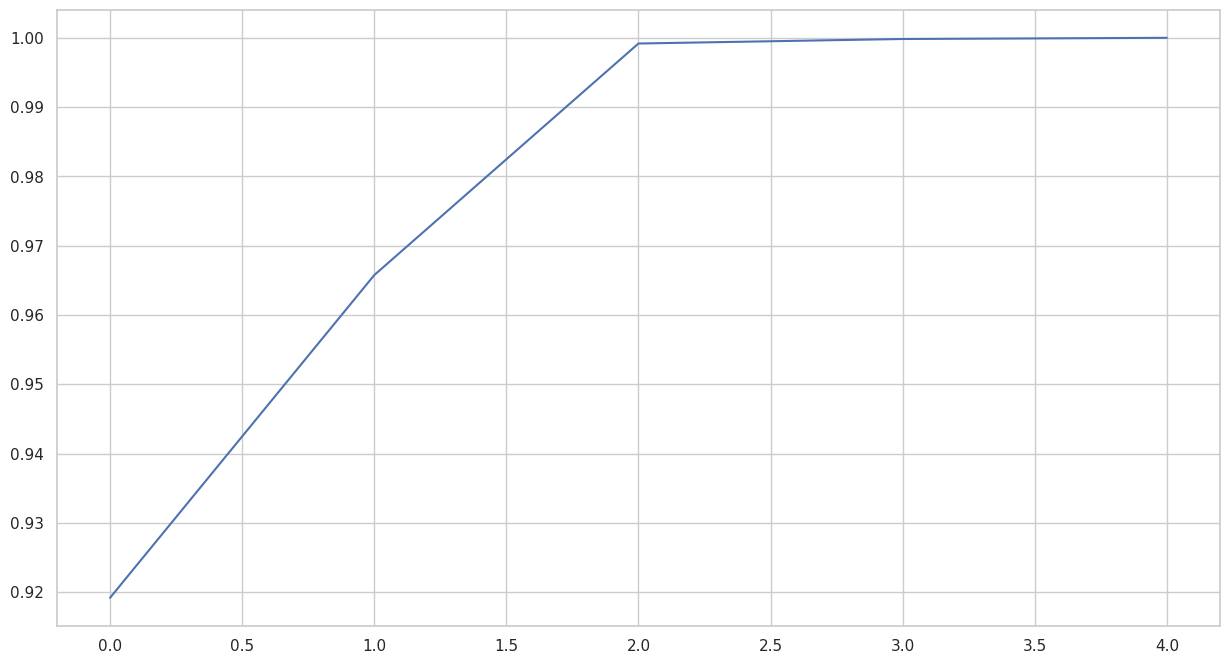

In [ ]:
pca.fit(deaths_analysis)
pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
x_pca = pca.transform(deaths_analysis)
x_pca.shape

(562, 5)

In [ ]:
deaths_analysis.head()

,date_published,death_type,deceased_age,deceased_gender,is_passenger
0,2000,12,39,0,True
1,2000,14,45,0,True
2,2000,11,78,0,True
3,2000,10,53,0,True
4,2000,10,65,1,True


##New

In [ ]:
innertia_values = []
silhouette_vocab = {'KMeans' : [], 'DBSCAN' : [], 'AgglomerativeClustering' : [], 'AffinityPropagation' : [],
                     'Birch' : [], 'MiniBatchKMeans' : [], 'SpectralClustering' : [], 'GaussianMixture' : []}
key_values = range(2, 21)

In [ ]:
for k in key_values:
  #kmeans
  k_means = KMeans(n_clusters = k, random_state = 42)
  k_means.fit(deaths_analysis)
  silhouette_vocab['KMeans'].append(silhouette_score(deaths_analysis, k_means.labels_))
  #DBSCAN
  db = DBSCAN()
  db_preds = db.fit_predict(deaths_analysis)
  silhouette_vocab['DBSCAN'].append(silhouette_score(deaths_analysis, db_preds))
  #Agg
  agg = AgglomerativeClustering(n_clusters = k)
  agg_preds = agg.fit_predict(deaths_analysis)
  silhouette_vocab['AgglomerativeClustering'].append(silhouette_score(deaths_analysis, agg_preds))
  #Aff
  aff = AffinityPropagation()
  aff_preds = aff.fit_predict(deaths_analysis)
  silhouette_vocab['AffinityPropagation'].append(silhouette_score(deaths_analysis, aff_preds))
  #Birch
  br = Birch(n_clusters = k, threshold = 1)
  br_preds = br.fit_predict(deaths_analysis)
  silhouette_vocab['Birch'].append(silhouette_score(deaths_analysis, br_preds))
  #MBKM
  mbkm = MiniBatchKMeans(n_clusters = k, batch_size = 20)
  mbkm_preds = mbkm.fit_predict(deaths_analysis)
  silhouette_vocab['MiniBatchKMeans'].append(silhouette_score(deaths_analysis, mbkm_preds))
  #SpectralClustering
  spect = SpectralClustering(n_clusters = k, affinity = 'nearest_neighbors')
  spect_preds = spect.fit_predict(deaths_analysis)
  silhouette_vocab['SpectralClustering'].append(silhouette_score(deaths_analysis, spect_preds))
  #GM
  gaus = GaussianMixture(n_components = k, random_state = 42)
  gaus_preds = gaus.fit_predict(deaths_analysis)
  silhouette_vocab['GaussianMixture'].append(silhouette_score(deaths_analysis, gaus_preds))

In [ ]:
deaths_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   date_published   562 non-null    int64
 1   death_type       562 non-null    int64
 2   deceased_age     562 non-null    int64
 3   deceased_gender  562 non-null    int64
 4   is_passenger     562 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 18.2 KB


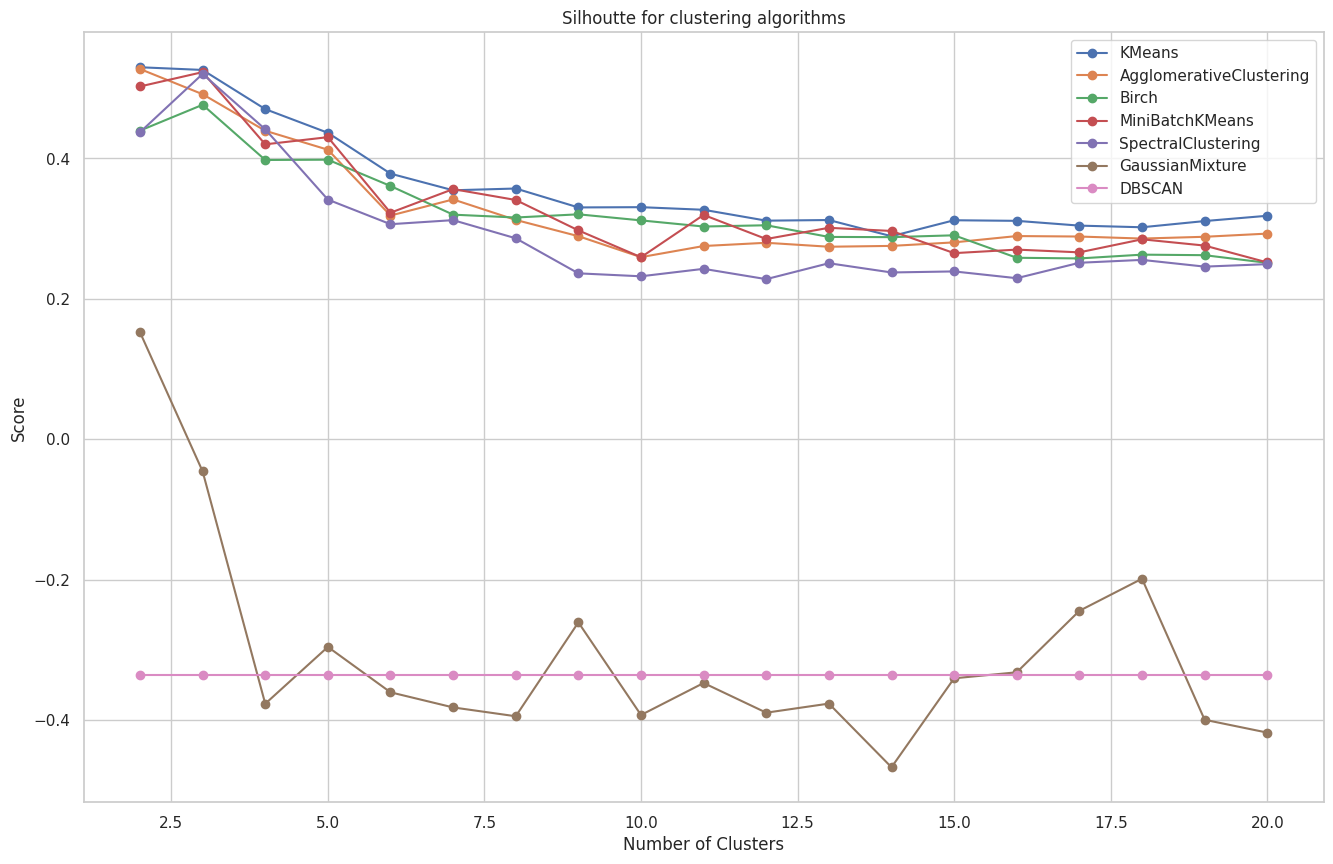

In [ ]:
plt.figure(figsize = (16, 10))
modules = {'KMeans' : 'o',
           'AgglomerativeClustering' : 'o',
           'Birch' : 'o',
           'MiniBatchKMeans' : 'o',
           'SpectralClustering' : 'o',
           'GaussianMixture' : 'o',
           'DBSCAN' : 'o'
           }
for model, style in modules.items():
  plt.plot(key_values, silhouette_vocab[model], marker = style, label = model)

plt.title('Silhoutte for clustering algorithms')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Silhoutte for KMeans')

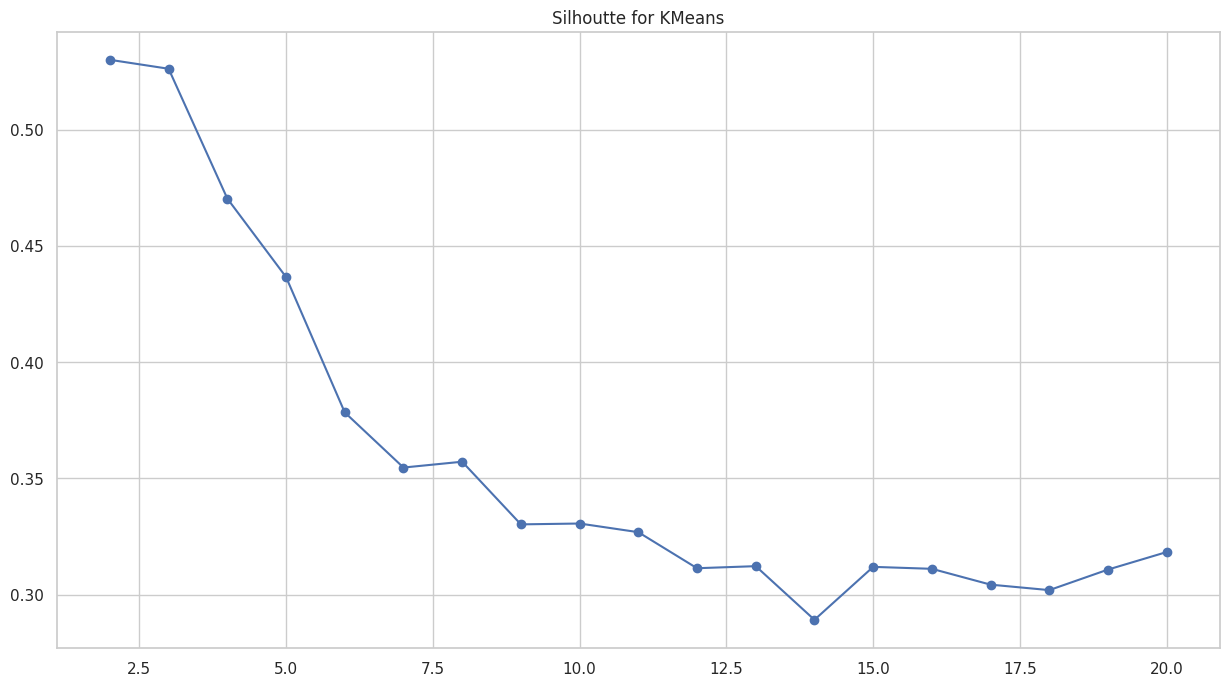

In [ ]:
plt.plot(key_values, silhouette_vocab['KMeans'], marker='o', label='KMeans')
plt.title('Silhoutte for KMeans')

In [ ]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(deaths_analysis)
deaths_analysis['k_means'] = k_means.labels_

Text(0.5, 1.0, 'KMeans cluster distribution')

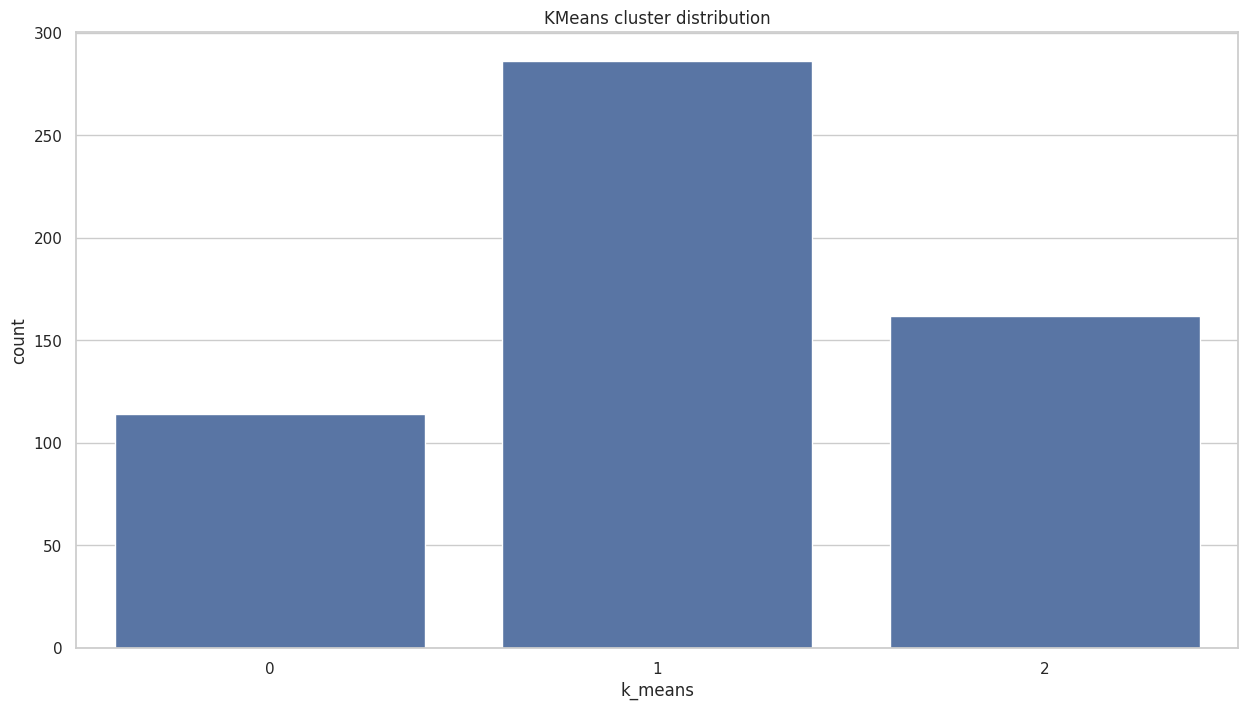

In [ ]:
sns.countplot(x = deaths_analysis['k_means'])
plt.title('KMeans cluster distribution')

In [ ]:
death_0 = deaths_analysis[deaths_analysis['k_means'] == 0]
death_1 = deaths_analysis[deaths_analysis['k_means'] == 1]
death_2 = deaths_analysis[deaths_analysis['k_means'] == 2]

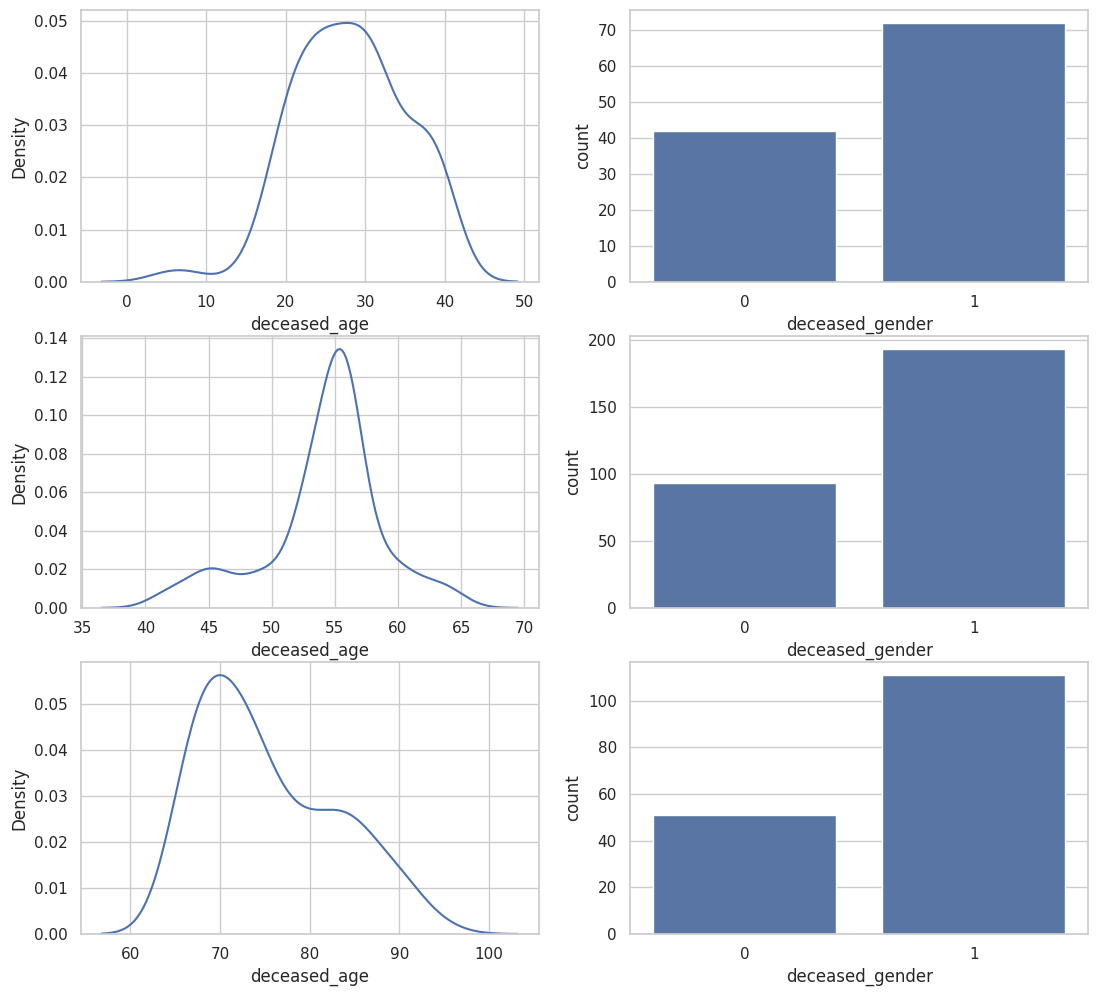

In [ ]:
plt.figure(figsize = (13, 12))

plt.subplot(321)
sns.kdeplot(x = death_0['deceased_age'])

plt.subplot(322)
sns.countplot(x = death_0['deceased_gender'])

plt.subplot(323)
sns.kdeplot(x = death_1['deceased_age'])

plt.subplot(324)
sns.countplot(x = death_1['deceased_gender'])

plt.subplot(325)
sns.kdeplot(x = death_2['deceased_age'])

plt.subplot(326)
sns.countplot(x = death_2['deceased_gender']);

##Hypothesis testing

In [ ]:
alpha = 0.05
tstatistics, pvalue = st.ttest_ind(death_0['deceased_age'], death_1['deceased_age'])
print(tstatistics, pvalue)
if pvalue < alpha:
  print('Rejecting the null hypothesis, means of these two groups are different')
else:
  print('We can not reject the null hypothesis, there is no statistical difference between groups')

-43.35184880805583 7.765453088966889e-153
Rejecting the null hypothesis, means of these two groups are different


In [ ]:
alpha = 0.05
tstatistics, pvalue = st.ttest_ind(death_1['deceased_age'], death_2['deceased_age'])
print(tstatistics, pvalue)
if pvalue < alpha:
  print('Rejecting the null hypothesis, means of these two groups are different')
else:
  print('We can not reject the null hypothesis, there is no statistical difference between groups')

-36.729546948842234 6.036942112092618e-137
Rejecting the null hypothesis, means of these two groups are different


In [ ]:
alpha = 0.05
tstatistics, pvalue = st.ttest_ind(death_0['deceased_age'], death_2['deceased_age'])
print(tstatistics, pvalue)
if pvalue < alpha:
  print('Rejecting the null hypothesis, means of these two groups are different')
else:
  print('We can not reject the null hypothesis, there is no statistical difference between groups')

-52.47985535361807 5.674440368086628e-145
Rejecting the null hypothesis, means of these two groups are different


In [ ]:
deaths_analysis.sort_values(by = 'date_published', inplace = True)

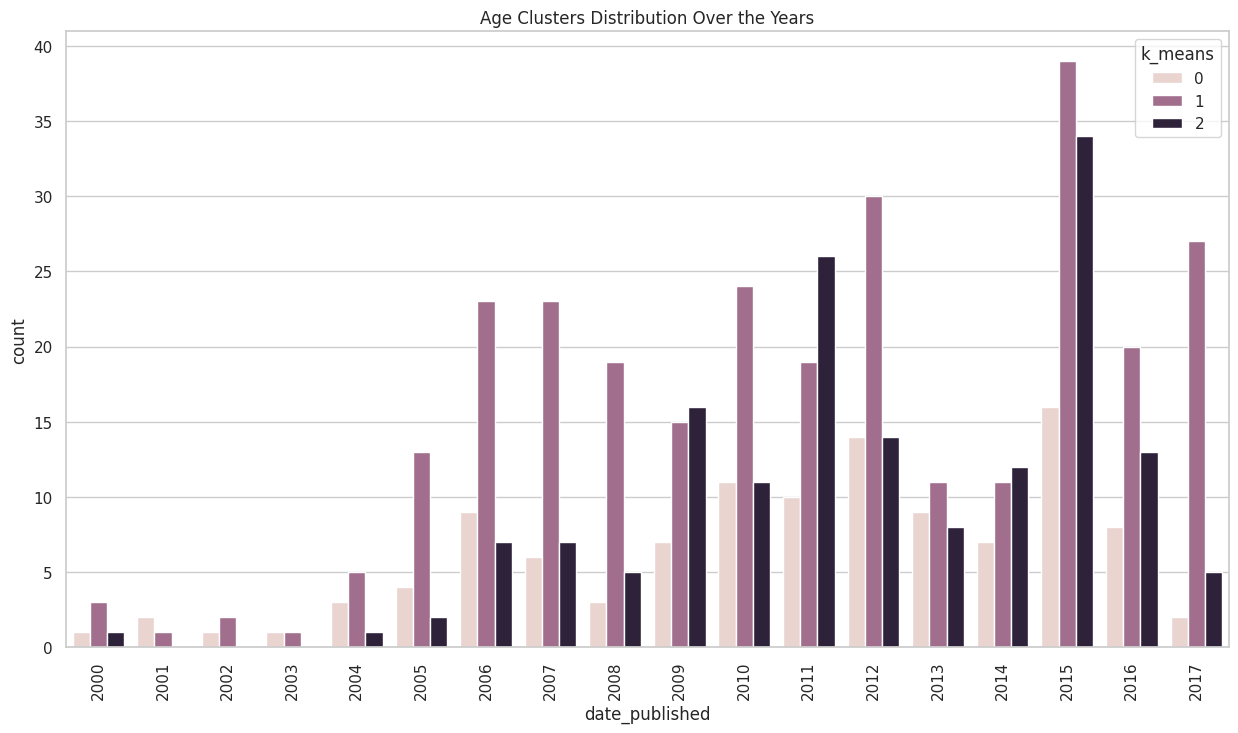

In [ ]:
sns.countplot(x = deaths_analysis['date_published'], hue = deaths_analysis['k_means'])
plt.xticks(rotation = 90)
plt.title('Age Clusters Distribution Over the Years');

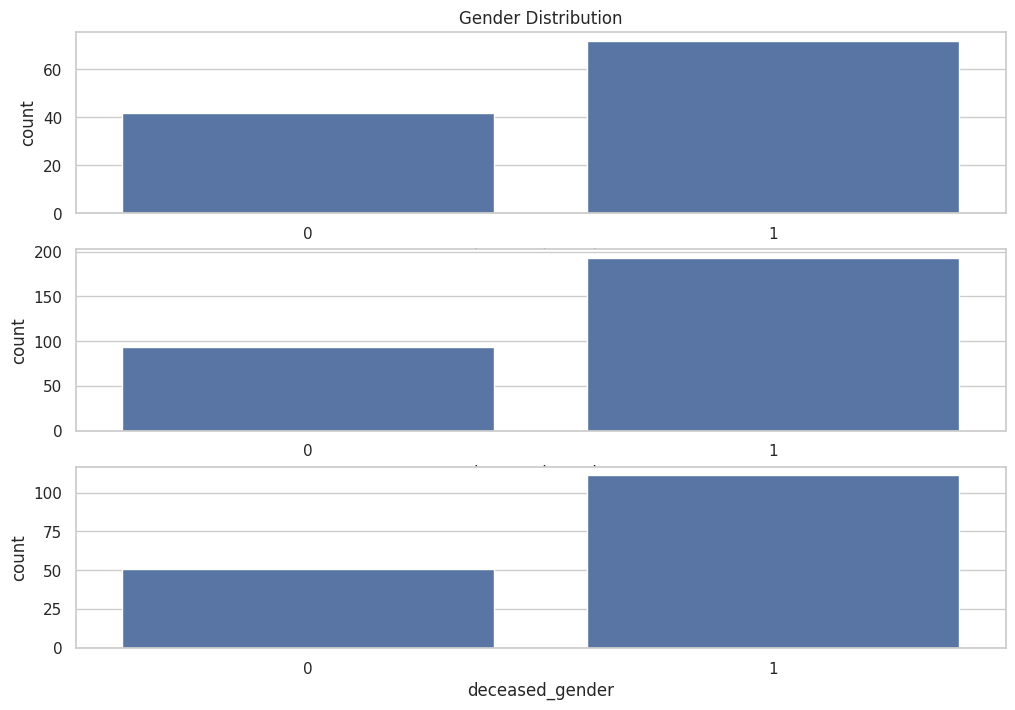

In [ ]:
plt.figure(figsize = (12, 8))

plt.subplot(311)
sns.countplot(x = death_0['deceased_gender'])
plt.title('Gender Distribution')

plt.subplot(312)
sns.countplot(x = death_1['deceased_gender'])

plt.subplot(313)
sns.countplot(x = death_2['deceased_gender']);

**The group of passengers aged 50 to 60 stands out as the most susceptible to the risk of death on cruise ships. In this category, as in other age groups, men prevail, but women also constitute a significant portion, approximately 30% of the total. An increase in the average mortality rate has been observed over the years. This trend is likely associated with the growing popularity of cruises, as well as the rising average age of the affluent population in developed countries where cruises are most popular.**